In [1]:
import matplotlib.cm as cm
import numpy as np

import os.path
import sys
sys.path.append('../../libs/neuroneap') #('../../libs/')
sys.path.append('../../mylibs')
sys.path.append('../../Francheska')

import matplotlib.pylab as plt
import matplotlib.colors as colors

import mylibs.plot_supp as pls

%matplotlib inline

# LFP
from eap import field, cell, graph
postfix = ''#'_zoom' ''
ais_coord = [-8.10, -69.90]

In [2]:
def find_max_mf(data):
    print data.keys()
    Bx = data['Bx']
    By = data['By']
    Bz = data['Bz']
    
    print 'data', np.shape(data)
    
    lens = np.sqrt(Bx**2+By**2+Bz**2)
    data_max = np.nanmax(lens, axis=0)
    return data_max


In [3]:
def plot_scalebar(ax, scalebar = 100, xp = 100, yp = -100):
# scalebar
    w, h = scalebar, scalebar
    plt.plot([xp, xp], [yp, yp+h], 'k-')
    plt.plot([xp, xp+h], [yp, yp], 'k-')
    plt.text(xp, yp+h/2., str(scalebar) +u" µm", ha='right', va='center',
             transform=ax.transData)
    plt.text(xp+h/2., yp, str(scalebar) + u" µm", ha='center', va='top',
             transform=ax.transData)

['n_samp', 'record_x_range', 'YY', 'XX', 'record_y_range', 'Bx', 'By', 'Bz']
data ()


/home/maria/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


['n_samp', 'record_x_range', 'YY', 'XX', 'record_y_range', 'Bx', 'By', 'Bz']
data ()
1.0


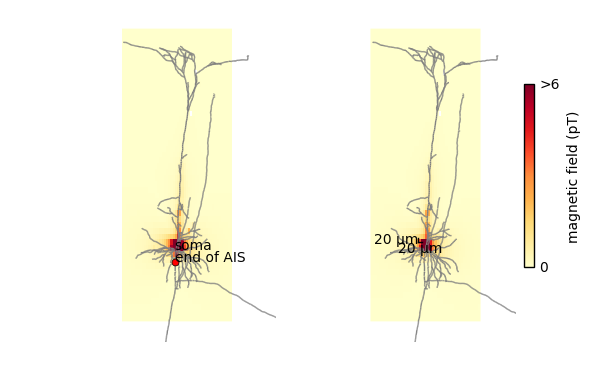

In [4]:
data_all = np.load('data/data_hallerman.npz')


# load original Hallermann mf
#data0 = np.load('data/mf'+postfix+'_zoom.npz')
data0 = np.load('data/mf'+postfix+'.npz')
record_x_range0 = data0['record_x_range']
record_y_range0 = data0['record_y_range']
#data0 = data0/10e12    # convert Tesla to pTesla

# load disactivated AIS Hallermann mf
#data1 = np.load('data/mf_noAIS_zoom.npz')
data1 = np.load('data/mf_noAIS'+postfix+'.npz')
record_x_range1 = data1['record_x_range']
record_y_range1 = data1['record_y_range']
#data1 = data1/10e12    # convert Tesla to pTesla

# plot the magnetic field
#time_to_plot = np.argmax(data['v_soma']) # calculate this at the AP init, peak and after
#print data.keys()
#dt = data['dt']

#plt.quiver(XX, YY, Bx[time_to_plot, :, :], By[time_to_plot, :, :])
lens0= find_max_mf(data0)
#lens0=lens0/np.max(lens0) # normalize by largest value
lens1= find_max_mf(data1)
#lens1=lens1/np.max(lens1)

lens0 = lens0/1e-12    # convert Tesla to pTesla
lens1 = lens1/1e-12    # convert Tesla to pTesla
print 1e12/10**(12)

if postfix == '_zoom':
    max_max = 60
else:
    max_max = 6

max_color = max_max #0.00000000006
vmax = max_max
vmin = 0

#np.max(lens0), np.max(lens1)
#vmax = np.max(np.max(lens0),np.max(lens1))
ax1 = plt.subplot(121)
plt.plot(ais_coord[0],ais_coord[1], 'ro', ms=5)
col = graph.plot_neuron(data_all['seg_coords'], colors='0.5', autolim=True)
pl0 = plt.imshow(lens0, interpolation="nearest", 
           extent=(record_x_range0[0], record_x_range0[1], record_y_range0[0], record_y_range0[1]), 
           origin='lower', vmin=vmin, vmax=max_color, cmap=cm.YlOrRd)
ax1.axis('off')
ax1.set_ylim(record_y_range1)
ax1.set_xlim(record_x_range1)


pls.clean_plot(ax1)
plt.text(-8,0,'soma')
plt.text(ais_coord[0],ais_coord[1],'end of AIS')

ax2 = plt.subplot(122)
col = graph.plot_neuron(data_all['seg_coords'], colors='0.5', autolim=True)
pl1 = plt.imshow(lens1, interpolation="nearest", 
           extent=(record_x_range1[0], record_x_range1[1], record_y_range1[0], record_y_range1[1]), 
           origin='lower', vmin=vmin, vmax=max_color, cmap=cm.YlOrRd)
ax2.axis('off')
ax2.set_ylim(record_y_range1)
ax2.set_xlim(record_x_range1)
scalebar = 20
xp_scbar=-40
yp_scbar=40

if scalebar != None:
    plot_scalebar(ax2, scalebar=scalebar,xp=xp_scbar,yp=yp_scbar)

cbar = plt.colorbar(pl1,fraction=0.046, pad=0.04, ticks=[0,max_color])
cbar.ax.set_ylabel('magnetic field (pT)')
cbar.ax.set_yticklabels([str(0), '>'+str(max_color)]) #6e-11'])

plt.tight_layout()
plt.savefig('figs/magnetic_field'+postfix+'.pdf')